## Manitoba Wildfire Prediction - Final Project for Predictive Analytics

### _By Angela Vargas, Student Number: 3176229_

#### Download Dependencies

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Load Data Set

In [42]:
# load df1 and cleaning
df1 = pd.read_csv('Historical_daily_weather_report_MB_2015_to_2018.csv')
print(df1.head())

              STATION  TEMP  RH  2015-03-02   WD    WS RAIN  FFMC   DMC  \
0           ATIK LAKE  -3.7  44  2015-03-02  225  13.2    0  85.2   0.1   
1             BISSETT  -4.3  47  2015-03-02  225  18.9  2.8  62.3     0   
2       BRANDON (YBR)  -6.8  97  2015-03-02  165    15    0  76.4  36.9   
3  BERENS RIVER (WCF)  -9.3  68  2015-03-02  168    17    0  79.9   0.1   
4      BURNTWOOD LAKE  -7.6  54  2015-03-02  232  11.3    0  83.7   6.9   

      DC  ISI   BUI  FWI  DSR  
0  214.3  4.2   0.2  0.9    0  
1  171.5  1.2   0.2  0.3    0  
2  442.6  1.8  61.1  6.2  0.7  
3   90.1  2.7   0.2  0.6    0  
4  236.3  3.1  12.9  3.8  0.3  


In [43]:
#Rename column as Date
df1 = df1.rename(columns={"2015-03-02":"Date"})
df1.head(2)

,STATION,TEMP,RH,Date,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR
0,ATIK LAKE,-3.7,44,2015-03-02,225,13.2,0,85.2,0.1,214.3,4.2,0.2,0.9,0
1,BISSETT,-4.3,47,2015-03-02,225,18.9,2.8,62.3,0,171.5,1.2,0.2,0.3,0


In [44]:
# remove duplicate name columns
#get list of column names
columns = df1.columns.tolist()
columns

['STATION',
 'TEMP',
 'RH',
 'Date',
 'WD',
 'WS',
 'RAIN',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'DSR']

In [45]:
# Remove duplicate column names from the rows
for col in columns:
    df1[col] = df1[col].apply(lambda x: x if x not in columns else None)

# Drop rows with all None values
df1.dropna(how='all', inplace=True)

# Print the cleaned DataFrame
print("\nRemoved duplicate column names DataFrame:")
print(df1)


Removed duplicate column names DataFrame:
                             STATION   TEMP                        RH  \
0                          ATIK LAKE   -3.7                        44   
1                            BISSETT   -4.3                        47   
2                      BRANDON (YBR)   -6.8                        97   
3                 BERENS RIVER (WCF)   -9.3                        68   
4                     BURNTWOOD LAKE   -7.6                        54   
...                              ...    ...                       ...   
122728                 WILLIAM RIVER    -24                        63   
122729          WILSON CR WEIR (WOO)  -18.1                        48   
122730                WINNIPEG (YWG)  -27.9                        66   
122731                     WOODRIDGE  -20.4                        55   
122732  Weather Calculations Reports      |  Weather Forecast Reports   

              Date   WD                    WS RAIN  FFMC   DMC     DC  ISI  \
0 

In [46]:
# data check missing values of all features
df1.isnull().sum()

STATION    23709
TEMP       23715
RH         17248
Date           0
WD         25242
WS         25270
RAIN       26682
FFMC       36259
DMC        36253
DC         36251
ISI        36419
BUI        36411
FWI        36409
DSR        36409
dtype: int64

In [47]:
#Remove empty rows
df1=df1.dropna()

In [48]:
#Validating the null are removed
df1.isnull().sum()

STATION    0
TEMP       0
RH         0
Date       0
WD         0
WS         0
RAIN       0
FFMC       0
DMC        0
DC         0
ISI        0
BUI        0
FWI        0
DSR        0
dtype: int64

In [49]:
# Column to move
column_to_move = 'Date'

# Get the list of columns
cols = df1.columns.tolist()

# Remove the column to move from the list and append it to the end
cols.remove(column_to_move)
cols.append(column_to_move)

In [50]:
df1= df1[cols]
df1

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date
0,ATIK LAKE,-3.7,44,225,13.2,0,85.2,0.1,214.3,4.2,0.2,0.9,0,2015-03-02
1,BISSETT,-4.3,47,225,18.9,2.8,62.3,0,171.5,1.2,0.2,0.3,0,2015-03-02
2,BRANDON (YBR),-6.8,97,165,15,0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02
3,BERENS RIVER (WCF),-9.3,68,168,17,0,79.9,0.1,90.1,2.7,0.2,0.6,0,2015-03-02
4,BURNTWOOD LAKE,-7.6,54,232,11.3,0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122727,WESTRAY,-21.5,68,270,5.6,0,75.6,0.1,133.3,1.1,0.2,0.2,0,2018-12-31
122728,WILLIAM RIVER,-24,63,270,6,0,76.2,0.1,223.6,1.1,0.2,0.2,0,2018-12-31
122729,WILSON CR WEIR (WOO),-18.1,48,334,16,0,79.1,2.2,316.5,2.3,4.3,0.9,0,2018-12-31
122730,WINNIPEG (YWG),-27.9,66,330,11,0,74.6,2.4,308.7,1.3,4.7,0.5,0,2018-12-31


In [11]:
#df1.to_csv('df1.csv', index=False)

In [51]:
#Reading next dataset
df2 = pd.read_csv('Historical_daily_weather_report_MB_2019_to_2020.csv')
print(df2.head())

              STATION  TEMP    RH     WD    WS  RAIN  FFMC   DMC     DC   ISI  \
0           ATIK LAKE  12.6  28.0  135.0  17.1   0.0  90.0  19.0   36.5  10.0   
1             BISSETT  17.2  25.0    0.0   9.9   0.3  91.4  24.4   79.4   8.6   
2       BRANDON (YBR)  13.2  36.0   21.0   8.0   0.0  90.5  21.9  188.4   6.9   
3  BERENS RIVER (WCF)  10.3  45.0  290.0  13.0   0.0   NaN   NaN    NaN   NaN   
4      BURNTWOOD LAKE  10.9  33.0  172.0  11.1   3.1   NaN   NaN    NaN   NaN   

    BUI   FWI  DSR  2019-04-22  
0  18.9  13.7  2.8  2019-04-22  
1  27.6  14.6  3.1  2019-04-22  
2  34.0  13.8  2.8  2019-04-22  
3   NaN   NaN  NaN  2019-04-22  
4   NaN   NaN  NaN  2019-04-22  


In [52]:
#Rename column as Date
df2 = df2.rename(columns={"2019-04-22":"Date"})
df2.head(2)

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date
0,ATIK LAKE,12.6,28.0,135.0,17.1,0.0,90.0,19.0,36.5,10.0,18.9,13.7,2.8,2019-04-22
1,BISSETT,17.2,25.0,0.0,9.9,0.3,91.4,24.4,79.4,8.6,27.6,14.6,3.1,2019-04-22


In [53]:
#Reading next dataset
df3 = pd.read_csv('Historical_daily_weather_report_MB_2021.csv')
print(df3.head())

          STATION  TEMP    RH     WD   WS  RAIN  FFMC   DMC     DC  ISI   BUI  \
0         BISSETT  -8.2  80.0  180.0  7.8   0.0  79.7  10.5  301.7  1.6  19.3   
1  CREIGHTON (SK)  -8.5  74.0  153.0  6.2   0.0  79.9   0.3  188.2  1.5   0.6   
2     DEVILS LAKE -10.9  77.0  180.0  6.1   0.0   NaN   NaN    NaN  NaN   NaN   
3   FLANDERS LAKE  -4.6  88.0  256.0  5.2   0.0  77.5  11.8  221.4  1.2  20.8   
4   GARY'S MEADOW  -7.6  74.0  146.0  6.1   0.3  69.7   1.9  483.3  0.8   3.8   

   FWI  DSR        Date  
0  2.3  0.1  2021-01-01  
1  0.4  0.0  2021-01-01  
2  NaN  NaN  2021-01-01  
3  1.4  0.0  2021-01-01  
4  0.3  0.0  2021-01-01  


In [54]:
#Reading next dataset
df4 = pd.read_csv('Historical_daily_weather_report_MB_2022.csv')
print(df4.head())

       STATION  TEMP    RH     WD    WS  RAIN  FFMC   DMC     DC  ISI   BUI  \
0  DEVILS LAKE -21.7  54.0   45.0  11.9   0.0  81.4  40.4  394.9  2.4  64.3   
1   GREEN LAKE -15.9  73.0   90.0  19.5   0.0  79.5   1.5  267.8  2.9   3.0   
2  PISEW FALLS -28.9  48.0  315.0   6.4   0.0  80.1   3.6  388.1  1.6   7.0   
3    SHERRIDON -31.0  60.0  317.0  10.0   0.0  78.1   5.3  366.7  1.6  10.2   
4    SNOW LAKE -31.0  55.0  332.0  13.4   0.0  79.1  12.7  504.4  2.0  23.9   

   FWI  DSR        Date  
0  8.5  1.2  2022-01-04  
1  1.1  0.0  2022-01-04  
2  0.8  0.0  2022-01-04  
3  1.0  0.0  2022-01-04  
4  3.6  0.3  2022-01-04  


In [55]:
#Reading next dataset
df5 = pd.read_csv('Historical_daily_weather_report_MB_2023.csv')
print(df5.head())

         STATION  TEMP    RH     WD   WS  RAIN  FFMC  DMC  DC  ISI  BUI  FWI  \
0    DEVILS LAKE  -9.3  84.0  270.0  6.4   0.0   NaN  NaN NaN  NaN  NaN  NaN   
1  GARY'S MEADOW -10.4  78.0  295.0  0.0   0.0   NaN  NaN NaN  NaN  NaN  NaN   
2   GODS NARROWS -12.2  84.0  284.0  5.9   0.0   NaN  NaN NaN  NaN  NaN  NaN   
3         JENPEG -12.7  93.0  349.0  4.8   0.0   NaN  NaN NaN  NaN  NaN  NaN   
4   OXFORD HOUSE -12.3  83.0    0.0  0.0   0.0   NaN  NaN NaN  NaN  NaN  NaN   

   DSR        Date  
0  NaN  2023-01-01  
1  NaN  2023-01-01  
2  NaN  2023-01-01  
3  NaN  2023-01-01  
4  NaN  2023-01-01  


In [56]:
#Reading next dataset
df6 = pd.read_csv('Historical_daily_weather_report_MB_2024.csv')
print(df6.head())

          STATION  TEMP    RH     WD    WS  RAIN  FFMC  DMC  DC  ISI  BUI  \
0   BEAUSEJOUR AG  -3.8  77.0  198.0  33.4   0.0   NaN  NaN NaN  NaN  NaN   
1  BIRCH RIVER AG  -2.1  72.0  230.0  21.8   0.0   NaN  NaN NaN  NaN  NaN   
2         ELMA AG  -2.8  79.0  198.0  20.2   0.0   NaN  NaN NaN  NaN  NaN   
3    ETHELBERT AG   3.6  62.0  285.0   8.4   0.0   NaN  NaN NaN  NaN  NaN   
4    FISHERTON AG  -3.2  76.0  199.0   8.6   0.0   NaN  NaN NaN  NaN  NaN   

   FWI  DSR        Date  
0  NaN  NaN  2024-01-01  
1  NaN  NaN  2024-01-01  
2  NaN  NaN  2024-01-01  
3  NaN  NaN  2024-01-01  
4  NaN  NaN  2024-01-01  


In [57]:
#Reading next dataset
df7 = pd.read_csv('MB-Weather-report_2024-07-24.csv')
print(df7.head())

              STATION  TEMP  RH   WD    WS  RAIN  FFMC   DMC     DC  ISI  \
0           ATIK LAKE  27.3  63  146  13.8   0.0  87.8  49.9  317.4  6.3   
1       BEAUSEJOUR AG  24.7  63  156  11.0   0.0  79.3  14.8  232.0  1.8   
2  BERENS RIVER (WCF)  23.9  67  175  13.0   0.0  82.0  10.7  146.5  2.7   
3      BIRCH RIVER AG  26.0  72  100   8.2   0.0  84.2  35.3  338.0  2.8   
4             BISSETT  26.6  43  127   7.3   0.0  88.1  20.5  122.3  4.7   

    BUI   FWI  DSR        Date  
0  71.6  19.1  5.0  2024-07-24  
1  25.5   3.4  0.2  2024-07-24  
2  18.1   4.1  0.3  2024-07-24  
3  55.9   8.9  1.3  2024-07-24  
4  28.9   9.2  1.4  2024-07-24  


In [58]:
#Reading next dataset
df8 = pd.read_csv('Historical_daily_weather_report_MB_July252024_to_July272024.csv')
print(df8.head())

              STATION  TEMP    RH     WD    WS  RAIN  FFMC   DMC     DC  ISI  \
0           ATIK LAKE  27.2  67.0  144.0  15.5   0.0  87.2  52.1  326.0  6.3   
1       BEAUSEJOUR AG  26.9  66.0  153.0  26.0   0.0  84.8  17.0  240.5  7.6   
2  BERENS RIVER (WCF)  27.3  65.0  143.0  21.0   0.0  85.4  13.0  155.1  6.4   
3      BIRCH RIVER AG  26.4  78.0   71.0   8.0   0.0  84.3  36.7  346.5  2.8   
4             BISSETT  28.0  50.0  144.0  13.3   0.0  88.6  23.9  131.1  6.8   

    BUI   FWI  DSR        Date  
0  74.4  19.6  5.3  2024-07-25  
1  29.0  13.7  2.8  2024-07-25  
2  21.6  10.2  1.6  2024-07-25  
3  58.0   9.1  1.4  2024-07-25  
4  32.8  13.5  2.7  2024-07-25  


In [59]:
#Reading next dataset
df9 = pd.read_csv('MB-Weather-report_2024-07-28.csv')
print(df9.head())

              STATION  TEMP  RH   WD    WS  RAIN  FFMC   DMC     DC  ISI  \
0           ATIK LAKE  22.9  64  259   8.6  11.3  57.9  30.3  313.4  0.5   
1       BEAUSEJOUR AG  24.3  60  285  14.5   0.0  86.3  24.0  265.6  5.2   
2  BERENS RIVER (WCF)  21.5  55  285  21.0   0.0  88.5  20.3  179.0  9.9   
3      BIRCH RIVER AG  23.5  55  244  11.7   0.0  88.3  45.1  370.2  6.0   
4             BISSETT  26.1  49  288   4.3   3.0  76.6  27.0  153.7  1.0   

    BUI   FWI  DSR        Date  
0  48.8   0.9  0.0  2024-07-28  
1  39.2  12.0  2.2  2024-07-28  
2  31.6  17.5  4.3  2024-07-28  
3  69.1  18.2  4.6  2024-07-28  
4  37.5   2.3  0.1  2024-07-28  


In [60]:
#Reading next dataset
df10 = pd.read_csv('MB-Weather-report_2024-07-29.csv')
print(df10.head())

              STATION  TEMP    RH   WD    WS  RAIN  FFMC   DMC     DC  ISI  \
0           ATIK LAKE  29.2  42.0  208  10.3   0.3  85.6  34.4  322.4  3.8   
1       BEAUSEJOUR AG  26.8  62.0  210  13.0   0.0  86.4  26.5  274.1  4.9   
2  BERENS RIVER (WCF)  23.2   NaN  190   7.0   0.0  86.7  22.1  186.9  3.8   
3      BIRCH RIVER AG  26.7  55.0  164  10.3   0.0  88.3  48.0  378.7  5.6   
4             BISSETT  27.4  54.0  231   4.2   0.0  85.3  30.0  162.3  2.7   

    BUI   FWI  DSR        Date  
0  54.3  11.3  2.0  2024-07-29  
1  42.7  12.0  2.2  2024-07-29  
2  34.1   8.5  1.2  2024-07-29  
3  72.9  17.9  4.5  2024-07-29  
4  41.1   7.0  0.8  2024-07-29  


In [61]:
#Reading next dataset
df11 = pd.read_csv('MB-Weather-report_2024-07-30.csv')
print(df11.head())

              STATION  TEMP  RH   WD    WS  RAIN  FFMC   DMC     DC  ISI  \
0           ATIK LAKE  31.0  43  271   4.4   0.0  89.8  38.7  331.7  5.1   
1       BEAUSEJOUR AG  29.2  57  180  18.5   0.0  87.6  29.6  283.0  7.6   
2  BERENS RIVER (WCF)  30.1  53  187  13.3   0.0  88.3  25.5  196.0  6.5   
3      BIRCH RIVER AG  29.3  53  101   3.1   0.0  88.4  51.4  387.7  4.0   
4             BISSETT  31.5  48  162  10.1   0.0  89.2  34.0  171.7  6.3   

    BUI   FWI  DSR        Date  
0  59.9  15.0  3.3  2024-07-30  
1  46.9  17.7  4.4  2024-07-30  
2  38.5  14.2  3.0  2024-07-30  
3  77.2  14.1  3.0  2024-07-30  
4  45.5  15.0  3.3  2024-07-30  


In [62]:
# Joining all datasets in one
mb_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)
mb_data

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date
0,ATIK LAKE,-3.7,44,225,13.2,0,85.2,0.1,214.3,4.2,0.2,0.9,0,2015-03-02
1,BISSETT,-4.3,47,225,18.9,2.8,62.3,0,171.5,1.2,0.2,0.3,0,2015-03-02
2,BRANDON (YBR),-6.8,97,165,15,0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02
3,BERENS RIVER (WCF),-9.3,68,168,17,0,79.9,0.1,90.1,2.7,0.2,0.6,0,2015-03-02
4,BURNTWOOD LAKE,-7.6,54,232,11.3,0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235660,WINNIPEG (XWG),28.5,53,168,28.0,0.0,88.3,33.8,202.5,13.7,47.7,27.1,9.3,2024-07-30
235661,WOODRIDGE,28.8,60,185,8.0,0.0,86.6,17.2,155.2,3.9,26.9,7.6,1.0,2024-07-30
235662,WUSKWATIM,28.6,45,177,12.1,22.9,72.1,15.5,125.3,1.2,23.7,1.8,0.1,2024-07-30
235663,YORKTON (PRJ),28.2,41,241,10.0,0.0,90.2,57.6,358.2,7.2,82.2,22.8,6.9,2024-07-30


### Data Exploration
- Original dataset exploration

In [64]:
mb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235665 entries, 0 to 235664
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   STATION  231729 non-null  object
 1   TEMP     231691 non-null  object
 2   RH       231424 non-null  object
 3   WD       231661 non-null  object
 4   WS       231696 non-null  object
 5   RAIN     231035 non-null  object
 6   FFMC     190601 non-null  object
 7   DMC      190601 non-null  object
 8   DC       190601 non-null  object
 9   ISI      190574 non-null  object
 10  BUI      190572 non-null  object
 11  FWI      190574 non-null  object
 12  DSR      190556 non-null  object
 13  Date     235665 non-null  object
dtypes: object(14)
memory usage: 25.2+ MB


In [65]:
#Transform text to float
mb_data[['TEMP','RH','WD','WS','RAIN',
         'FFMC','DMC','DC','ISI','BUI','FWI','DSR']] = mb_data[['TEMP','RH','WD','WS','RAIN',
                                                                'FFMC','DMC','DC','ISI','BUI','FWI','DSR']].astype(float)

In [ ]:
#mb_data.to_csv('mb_data.csv', index=False)

In [66]:
#Check again the dtype
mb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235665 entries, 0 to 235664
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATION  231729 non-null  object 
 1   TEMP     231691 non-null  float64
 2   RH       231424 non-null  float64
 3   WD       231661 non-null  float64
 4   WS       231696 non-null  float64
 5   RAIN     231035 non-null  float64
 6   FFMC     190601 non-null  float64
 7   DMC      190601 non-null  float64
 8   DC       190601 non-null  float64
 9   ISI      190574 non-null  float64
 10  BUI      190572 non-null  float64
 11  FWI      190574 non-null  float64
 12  DSR      190556 non-null  float64
 13  Date     235665 non-null  object 
dtypes: float64(12), object(2)
memory usage: 25.2+ MB


In [67]:
#Checking unique values for classification
mb_data.nunique()

STATION     130
TEMP        762
RH           98
WD          361
WS          478
RAIN        720
FFMC        977
DMC        1441
DC         7022
ISI         568
BUI        1799
FWI         817
DSR         619
Date       2947
dtype: int64

In [68]:
#datasets statistic description
mb_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATION,231729,130,GREEN LAKE,2926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,231691.0,NaN,NaN,NaN,8.007383,14.271439,-59.1,-2.2,10.6,19.8,60.0
RH,231424.0,NaN,NaN,NaN,59.984448,20.290715,0.0,44.0,59.0,76.0,100.0
WD,231661.0,NaN,NaN,NaN,196.103056,104.111861,0.0,112.0,208.0,286.0,360.0
WS,231696.0,NaN,NaN,NaN,12.879886,7.181279,0.0,8.0,11.7,16.5,67.0
RAIN,231035.0,NaN,NaN,NaN,1.45458,5.45065,-8.8,0.0,0.0,0.4,242.2
FFMC,190601.0,NaN,NaN,NaN,74.754146,18.601111,0.0,69.8,80.9,87.4,99.9
DMC,190601.0,NaN,NaN,NaN,21.07169,20.668134,0.0,5.5,15.4,30.3,248.1
DC,190601.0,NaN,NaN,NaN,243.468733,144.364112,-12.1,132.0,231.2,338.4,862.7
ISI,190574.0,NaN,NaN,NaN,4.090082,4.823729,-14.4,1.1,2.5,5.7,175.0


In [69]:
# data check missing values of all features
mb_data.isnull().sum()

STATION     3936
TEMP        3974
RH          4241
WD          4004
WS          3969
RAIN        4630
FFMC       45064
DMC        45064
DC         45064
ISI        45091
BUI        45093
FWI        45091
DSR        45109
Date           0
dtype: int64

### Data Preparation
- Complete dataset cleaning and preparation

In [70]:
#Remove empty rows
mb_data =mb_data.dropna()

In [71]:
#Verifying no null values
mb_data.isnull().sum()

STATION    0
TEMP       0
RH         0
WD         0
WS         0
RAIN       0
FFMC       0
DMC        0
DC         0
ISI        0
BUI        0
FWI        0
DSR        0
Date       0
dtype: int64

In [72]:
#Checking cleaned dataset statistics
mb_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATION,190517,130,GREEN LAKE,2563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,190517.0,NaN,NaN,NaN,10.853884,13.183709,-57.2,2.2,14.1,21.1,58.1
RH,190517.0,NaN,NaN,NaN,59.189463,20.40029,0.0,43.0,58.0,75.0,100.0
WD,190517.0,NaN,NaN,NaN,195.794727,103.501986,0.0,113.0,209.0,285.0,360.0
WS,190517.0,NaN,NaN,NaN,12.935973,7.07148,0.0,8.0,11.8,16.5,67.0
RAIN,190517.0,NaN,NaN,NaN,1.604911,5.405108,-8.8,0.0,0.0,0.5,239.5
FFMC,190517.0,NaN,NaN,NaN,74.752106,18.602589,0.0,69.8,80.9,87.4,99.9
DMC,190517.0,NaN,NaN,NaN,21.07599,20.670768,0.0,5.5,15.4,30.3,248.1
DC,190517.0,NaN,NaN,NaN,243.515856,144.344995,-12.1,132.1,231.2,338.4,862.7
ISI,190517.0,NaN,NaN,NaN,4.090586,4.824157,-14.4,1.1,2.5,5.7,175.0


In [73]:
#Check again the dtype with not null values
mb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190517 entries, 0 to 235664
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATION  190517 non-null  object 
 1   TEMP     190517 non-null  float64
 2   RH       190517 non-null  float64
 3   WD       190517 non-null  float64
 4   WS       190517 non-null  float64
 5   RAIN     190517 non-null  float64
 6   FFMC     190517 non-null  float64
 7   DMC      190517 non-null  float64
 8   DC       190517 non-null  float64
 9   ISI      190517 non-null  float64
 10  BUI      190517 non-null  float64
 11  FWI      190517 non-null  float64
 12  DSR      190517 non-null  float64
 13  Date     190517 non-null  object 
dtypes: float64(12), object(2)
memory usage: 21.8+ MB


#### Outliers Dataset

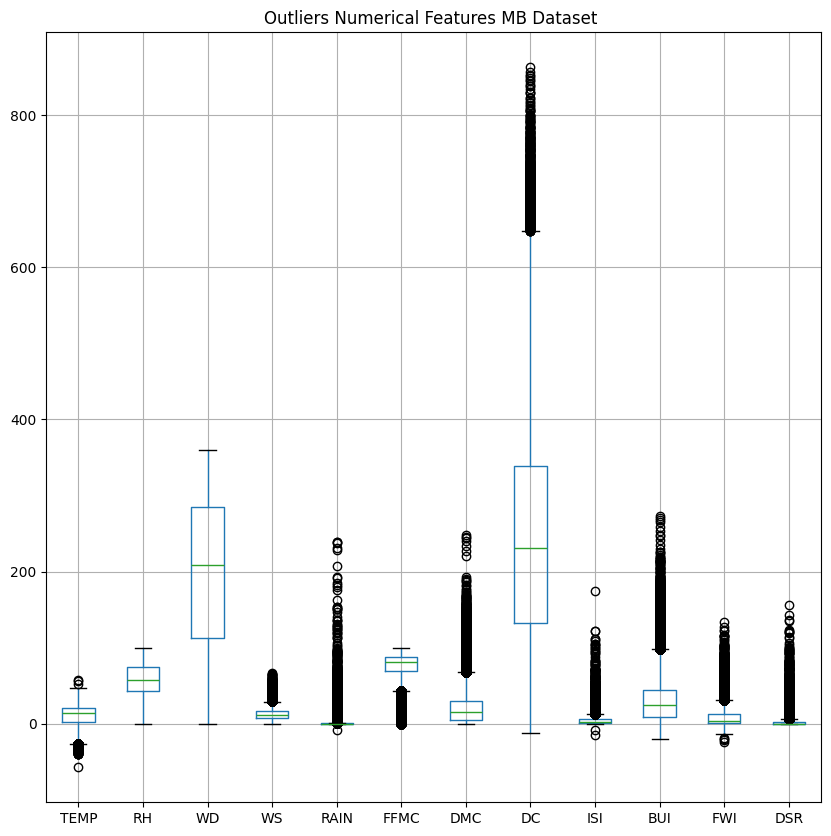

In [38]:
# Check outliers of all numerical features dataset 1
%matplotlib inline
mb_data.boxplot(column=['TEMP','RH','WD','WS','RAIN','FFMC','DMC','DC','ISI','BUI','FWI','DSR'],
                return_type='axes', figsize=(10,10))
plt.title("Outliers Numerical Features MB Dataset ")
plt.show()

Note. the ouliers will not be removed due the nature of the data, these are Weather conditions and calculations which do not have similar patterns.

#### Distribution Plot - Correlation Datasets

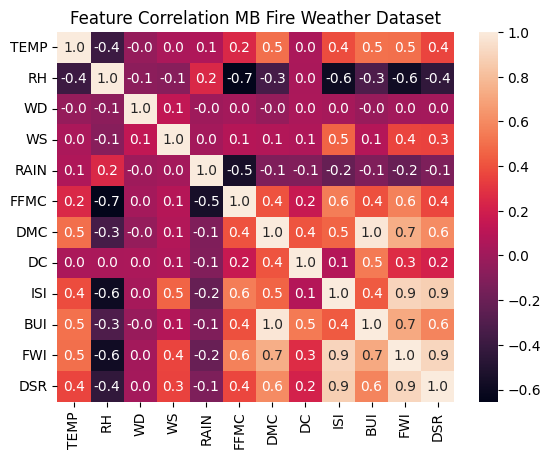

In [39]:
#Checking correlation of features
corr_matrix_1 = mb_data[['TEMP','RH','WD','WS','RAIN','FFMC','DMC','DC','ISI','BUI','FWI','DSR']].corr()
# feature correlations heatmap
sns.heatmap(corr_matrix_1, annot=True, fmt='.1f')
plt.title('Feature Correlation MB Fire Weather Dataset')
plt.show()